In [1]:
import tables as tb
import pandas as pd
import numpy  as np
from invisible_cities.database import load_db

In [2]:
from invisible_cities.icaro.mpl_functions import circles
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [3]:
run_number = 0
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
sipm_adc_to_pes = DataSiPM.adc_to_pes.values.astype(np.double)

In [4]:
def plot_tracking_plane(sipm_data, evt):
    energy = sipm_data[evt,:,:].sum(axis=1)
    xs = DataSiPM.X.values
    ys = DataSiPM.Y.values
    circles(xs, ys, 2*np.ones((1792)), c=energy, cmap='Reds', vmin=min(energy), vmax=max(energy))

# MCRD file

Plot some events to check correct mapping

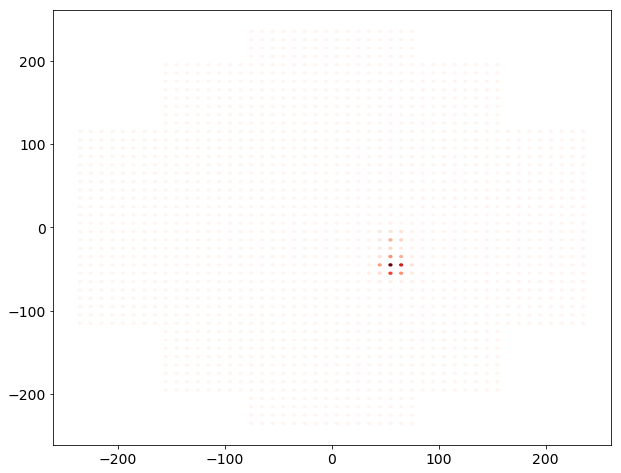

In [5]:
h5_mcrd = tb.open_file('cs_10000.root.h5')
plot_tracking_plane(h5_mcrd.root.sipmrd, evt=0)

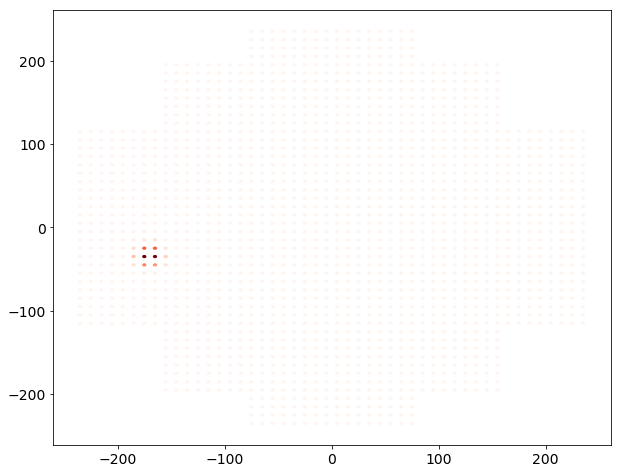

In [6]:
plot_tracking_plane(h5_mcrd.root.sipmrd, evt=1)

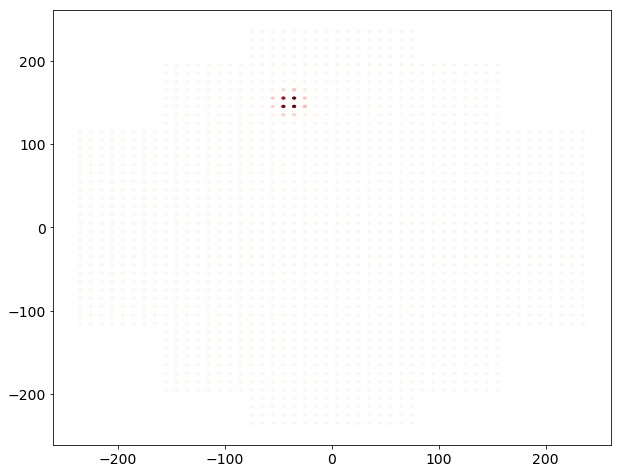

In [7]:
plot_tracking_plane(h5_mcrd.root.sipmrd, evt=2)

It seems to be working

# RWF file

Same with RWF file:

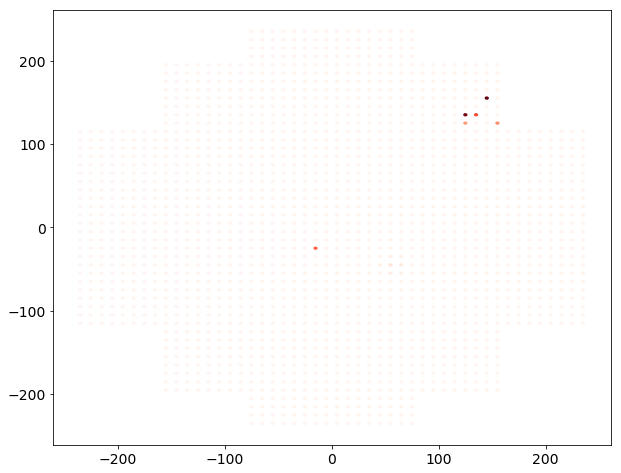

In [8]:
h5_rwf = tb.open_file('cs_rwf_1000.root.h5')
plot_tracking_plane(h5_rwf.root.RD.sipmrwf, evt=0)

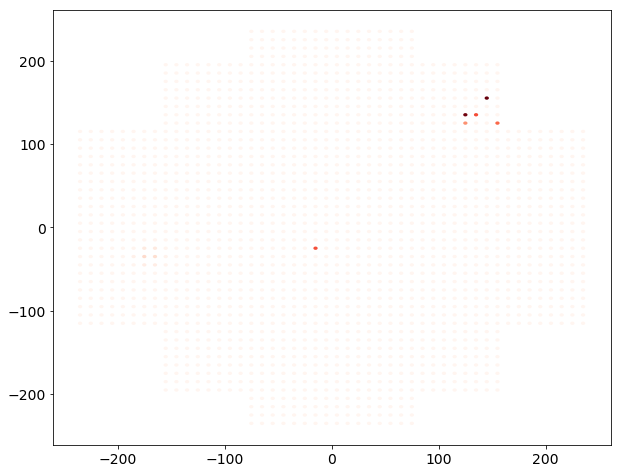

In [9]:
plot_tracking_plane(h5_rwf.root.RD.sipmrwf, evt=1)

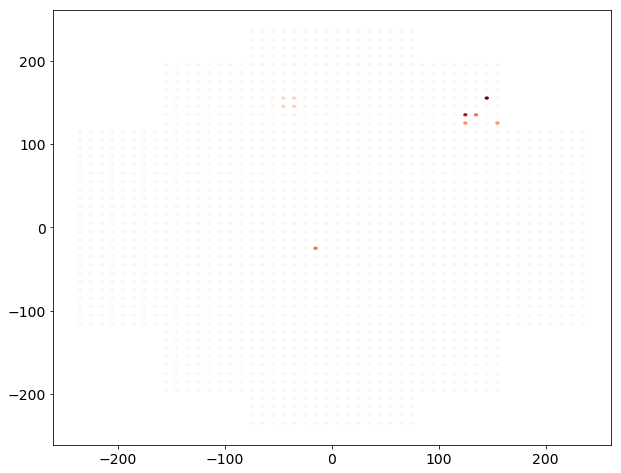

In [10]:
plot_tracking_plane(h5_rwf.root.RD.sipmrwf, evt=2)

There is probably an error somewhere...

# Run Diomira over the input file using the same mapping and check result

In [11]:
from invisible_cities.core.random_sampling   import NoiseSampler as SiPMsNoiseSampler
from invisible_cities.reco               import sensor_functions as sf
from invisible_cities.reco               import wfm_functions as wfm

In [12]:
sipm_noise_cut = 3.5
_, NSIPM, SIPMWL = h5_mcrd.root.sipmrd.shape
noise_sampler = SiPMsNoiseSampler(SIPMWL, True)
# thresholds in adc counts
sipms_thresholds = (sipm_noise_cut * sipm_adc_to_pes)

Process first event:

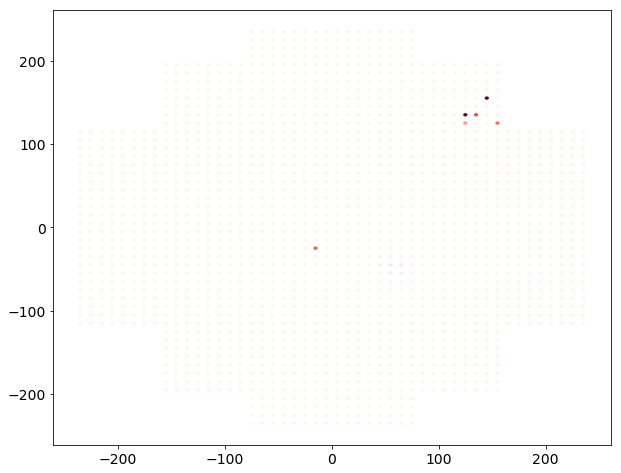

In [13]:
event = 0
dataSiPM_noisy = sf.simulate_sipm_response(event, h5_mcrd.root.sipmrd, noise_sampler, sipm_adc_to_pes)
dataSiPM = wfm.noise_suppression(dataSiPM_noisy, sipms_thresholds)
plot_tracking_plane(dataSiPM.reshape(1, NSIPM, SIPMWL), evt=0)

Process second event:

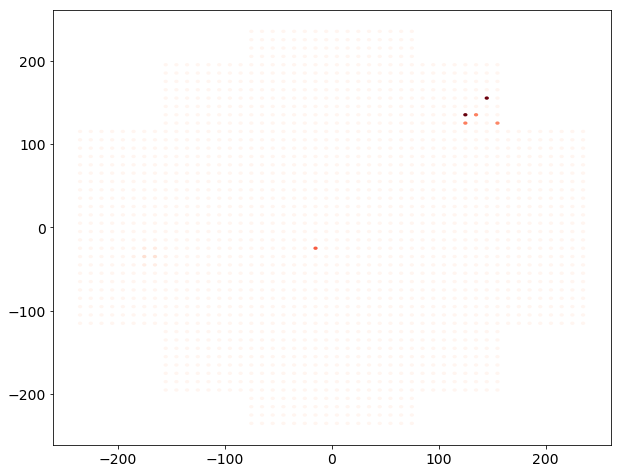

In [14]:
event = 1
dataSiPM_noisy = sf.simulate_sipm_response(event, h5_mcrd.root.sipmrd, noise_sampler, sipm_adc_to_pes)
dataSiPM = wfm.noise_suppression(dataSiPM_noisy, sipms_thresholds)
plot_tracking_plane(dataSiPM.reshape(1, NSIPM, SIPMWL), evt=0)

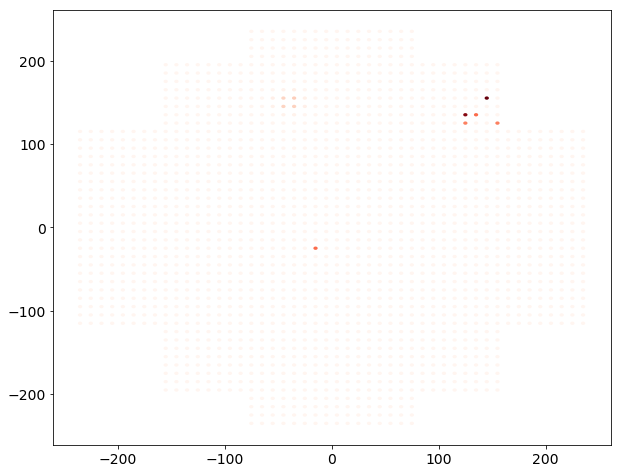

In [15]:
event = 2
dataSiPM_noisy = sf.simulate_sipm_response(event, h5_mcrd.root.sipmrd, noise_sampler, sipm_adc_to_pes)
dataSiPM = wfm.noise_suppression(dataSiPM_noisy, sipms_thresholds)
plot_tracking_plane(dataSiPM.reshape(1, NSIPM, SIPMWL), evt=0)

Same result as got in the file, not working...